# P1 - Time Series Analysis

Due date: July 18, 2021, 11:59 pm

- The result will be evaluated from a report in Jupyter, which must be found in a public GitHub repository.
- The project must be carried out in the groups assigned in class.
- Use clear and rigorous procedures.
- Due date: July 18, 2021, 11:59 pm, through Bloque Neón + (Upload repository link)
- Projects will not be received after the delivery time or by any other means than the one established.

The project seeks to analyze a question of interest, which can be framed within a context, in order to interpret the results

1. Choosing your time series (Friday July 11th).

For the project, each group must select a dataset of their choice where the analysis can be performed using a time series model. There are many sources of time series data on the Internet. Government agencies are some of the best sources. But be resourceful. It is better to find a data set is from a process that interests you. Use a recent time-series, also try to avoid a tipical stock-price / exchange rates series. The selected time series must be sent no later than Sunday, July 11, 11:59 pm, through Sicua +, for approval.

The analysis of the data must consider:

2. Analysis of the context of the problem and relevance of the analysis: This should answer the question of why it is interesting or important to study the selected data.

3. Understanding the data: Understand and analyze the main components of the time series, for example: seasonality, cyclicity, autocorrelation, behavior of the residuals, among others. Make use of graphs that allow you to understand each of the components clearly.

4. Application of the models in predictions: Correct use of the models seen in class to make predictions related to the problem of interest.

5. Conclusions: The conclusions must be relevant to the problem of interest. Conclusions on the procedures performed are also expected.

In [1]:
import pandas as pd
import holidays_co
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('../datasets/dataset_proyecto1.zip')

In [3]:
df.head()
df.columns

Index(['date', 'warehouse_id_ref', 'itemid', 'demand', 'pending_demand',
       'lastPrice', 'Price', 'stock', 'available_stock', 'city',
       'CAT_ACCESORIOS', 'CAT_EXPOPET', 'CAT_SNACKS', 'CAT_MEDICINAS',
       'CAT_CUIDADO_E_HIGIENE', 'CAT_JUGUETES', 'CAT_ALIMENTO_PRESCRIPCION',
       'CAT_HIGIENE', 'CAT_REGALOS', 'CAT_PARA_PETLOVERS', 'CAT_FARMAPET',
       'CAT_PREMIOS', 'CAT_VETERINARIOS', 'CAT_ALIMENTO', 'CAT_COMBOS',
       'CAT_ARENAS'],
      dtype='object')

In [4]:
df['ALIMENTOS'] = (df.CAT_SNACKS + df.CAT_ALIMENTO_PRESCRIPCION + df.CAT_ALIMENTO) >= 1
df['ALIMENTOS'] = df.ALIMENTOS.astype('int')
df.head()

,date,warehouse_id_ref,itemid,demand,pending_demand,lastPrice,Price,stock,available_stock,city,...,CAT_HIGIENE,CAT_REGALOS,CAT_PARA_PETLOVERS,CAT_FARMAPET,CAT_PREMIOS,CAT_VETERINARIOS,CAT_ALIMENTO,CAT_COMBOS,CAT_ARENAS,ALIMENTOS
0,2020-08-17T00:00:00.000Z,1,9953,0,0,11560.0,11560.0,3.0,1.0,Bogota,...,0,0,0,1,0,0,0,0,0,0
1,2020-08-18T00:00:00.000Z,1,9953,0,0,11560.0,11560.0,3.0,1.0,Bogota,...,0,0,0,1,0,0,0,0,0,0
2,2020-08-19T00:00:00.000Z,1,9953,2,0,11560.0,11560.0,3.0,1.0,Bogota,...,0,0,0,1,0,0,0,0,0,0
3,2020-08-20T00:00:00.000Z,1,9953,0,0,11560.0,11560.0,3.0,1.0,Bogota,...,0,0,0,1,0,0,0,0,0,0
4,2020-08-21T00:00:00.000Z,1,9953,0,0,11560.0,11560.0,3.0,1.0,Bogota,...,0,0,0,1,0,0,0,0,0,0


In [5]:
df = df[['date', 'warehouse_id_ref', 'itemid', 'demand', 'pending_demand', 
         'lastPrice', 'Price', 'stock', 'available_stock', 'city', 'ALIMENTOS']]

In [6]:
df_alimentos = df[(df.ALIMENTOS == 1) & (df.city == "Bogota")]
df_no_alimentos = df[(df.ALIMENTOS == 0) & (df.city == "Bogota")]
print( df.shape ) 
print( df_alimentos.shape ) 
print( df_no_alimentos.shape ) 

(2286885, 11)
(601346, 11)
(493996, 11)


In [7]:
df_alimentos = df_alimentos[df_alimentos['date'] >= '2020-09-01']
df_no_alimentos = df_no_alimentos[df_no_alimentos['date'] >= '2020-09-01']

In [8]:
df_alimentos.head()

,date,warehouse_id_ref,itemid,demand,pending_demand,lastPrice,Price,stock,available_stock,city,ALIMENTOS
345,2020-09-01T00:00:00.000Z,1,10642,4,0,3299.0,3299.0,154.0,1.0,Bogota,1
346,2020-09-02T00:00:00.000Z,1,10642,15,0,3299.0,3299.0,154.0,1.0,Bogota,1
347,2020-09-03T00:00:00.000Z,1,10642,7,0,3299.0,3299.0,154.0,1.0,Bogota,1
348,2020-09-04T00:00:00.000Z,1,10642,2,0,3299.0,3299.0,154.0,1.0,Bogota,1
349,2020-09-05T00:00:00.000Z,1,10642,8,0,3299.0,3299.0,226.0,1.0,Bogota,1


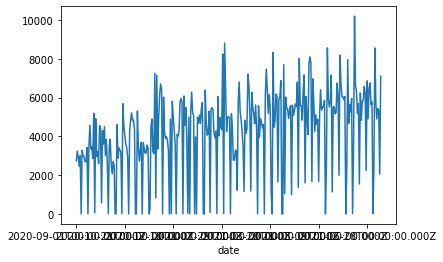

In [9]:
df_alimentos.groupby('date')['demand'].sum().plot()

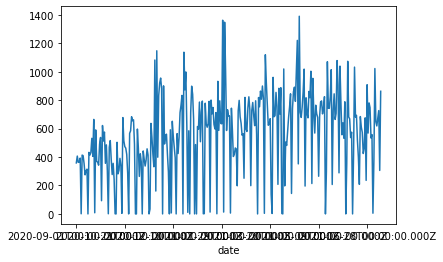

In [10]:
df_no_alimentos.groupby('date')['demand'].sum().plot()

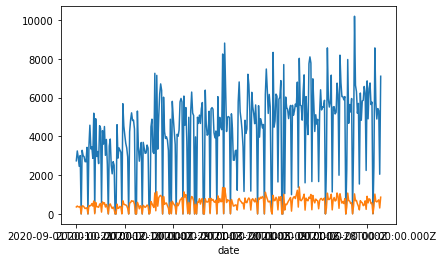

In [11]:
df_alimentos.groupby('date')['demand'].sum().plot()
df_no_alimentos.groupby('date')['demand'].sum().plot()

In [12]:
df_alimentos.date = pd.to_datetime(df_alimentos.date)
df_alimentos = df_alimentos.dropna()

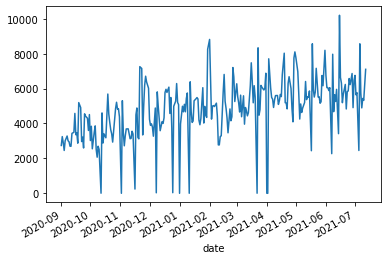

In [13]:
df_alimentos_sin_fds = df_alimentos[ ~df_alimentos.date.dt.weekday.isin([6]) ]
df_alimentos_sin_fds.groupby('date')['demand'].sum().plot()

In [14]:
df_alimentos_sin_fds.date.dt.weekday.value_counts()

0    82314
5    82244
4    82201
3    82146
2    82017
1    81957
Name: date, dtype: int64

In [15]:
pd.date_range(start = df_alimentos.date.min(), 
              end = df_alimentos.date.max() ).difference(df_alimentos.date)

DatetimeIndex([], dtype='datetime64[ns, UTC]', freq=None)

In [16]:
festivos = [ x[0] for x in (holidays_co.get_colombia_holidays_by_year(2020) + holidays_co.get_colombia_holidays_by_year(2021)) ]

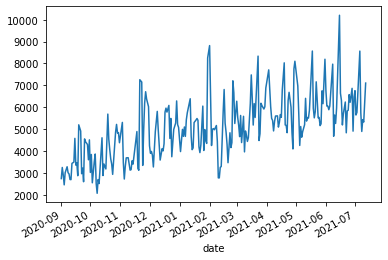

In [17]:
df_alimentos_sin_fds_ni_festivos = df_alimentos_sin_fds[ ~df_alimentos_sin_fds.date.isin( festivos ) ]
df_alimentos_sin_fds_ni_festivos.groupby('date')['demand'].sum().plot()

In [18]:
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    print("Results of Dickey-Fuller Test:")
    dftest = adfuller(timeseries, autolag="AIC")
    dfoutput = pd.Series(
        dftest[0:4],
        index=[
            "Test Statistic",
            "p-value",
            "#Lags Used",
            "Number of Observations Used",
        ],
    )
    for key, value in dftest[4].items():
        dfoutput["Critical Value (%s)" % key] = value
    print(dfoutput)

In [19]:
adf_test(df_alimentos_sin_fds_ni_festivos.groupby('date')['demand'].sum())

Results of Dickey-Fuller Test:
Test Statistic                  -3.558286
p-value                          0.006610
#Lags Used                       4.000000
Number of Observations Used    250.000000
Critical Value (1%)             -3.456781
Critical Value (5%)             -2.873172
Critical Value (10%)            -2.572969
dtype: float64


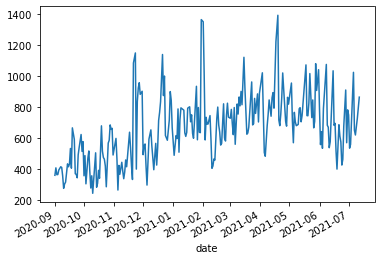

In [20]:
df_no_alimentos.date = pd.to_datetime(df_no_alimentos.date)
df_no_alimentos_sin_fds = df_no_alimentos[ ~df_no_alimentos.date.dt.weekday.isin([6]) ]
df_no_alimentos_sin_fds_ni_festivos = df_no_alimentos_sin_fds[ ~df_no_alimentos_sin_fds.date.isin( festivos ) ]
df_no_alimentos_sin_fds_ni_festivos.groupby('date')['demand'].sum().plot()

3. Understanding the data: Understand and analyze the main components of the time series, for example: seasonality, cyclicity, autocorrelation, behavior of the residuals, among others. Make use of graphs that allow you to understand each of the components clearly.

4. Application of the models in predictions: Correct use of the models seen in class to make predictions related to the problem of interest.

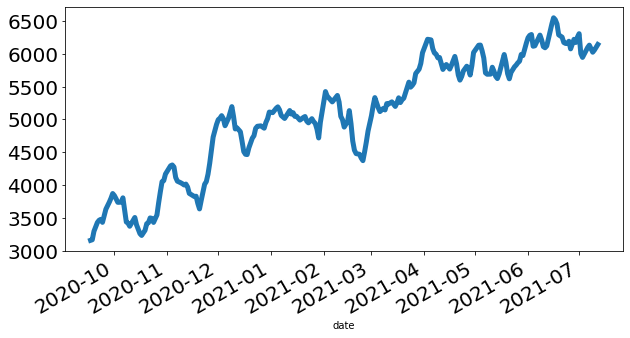

In [21]:
df_alimentos_sin_fds_ni_festivos.groupby('date')['demand'].sum().rolling(15).mean().plot(figsize=(10,5), linewidth=5, fontsize=20)

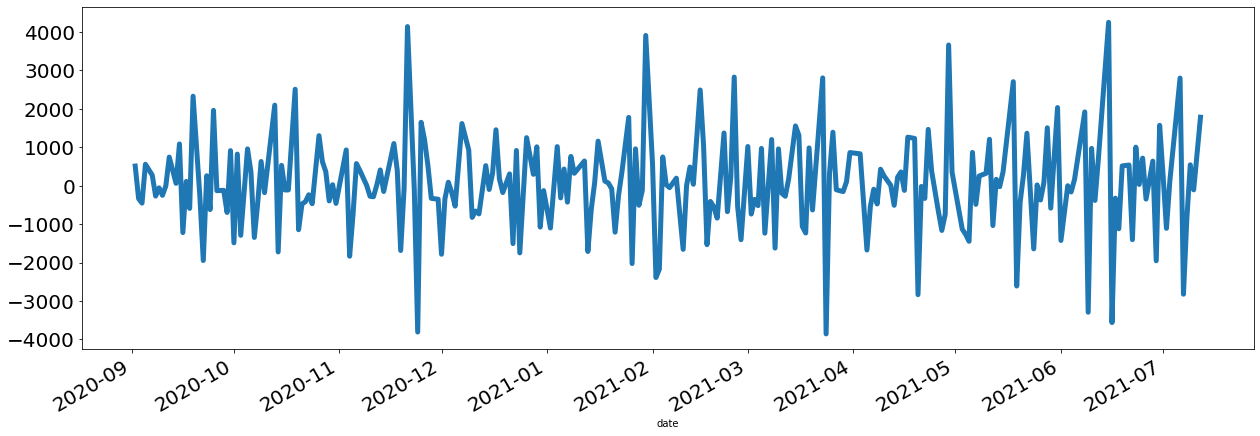

In [22]:
df_alimentos_sin_fds_ni_festivos.groupby('date')['demand'].sum().diff().plot(figsize=(21,7), linewidth=5, fontsize=20)

In [23]:
adf_test(df_alimentos_sin_fds_ni_festivos.groupby('date')['demand'].sum().diff()[1:])

Results of Dickey-Fuller Test:
Test Statistic                -6.930384e+00
p-value                        1.087945e-09
#Lags Used                     1.500000e+01
Number of Observations Used    2.380000e+02
Critical Value (1%)           -3.458128e+00
Critical Value (5%)           -2.873762e+00
Critical Value (10%)          -2.573283e+00
dtype: float64


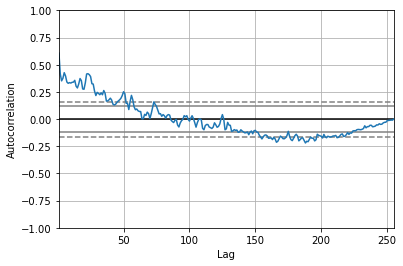

In [24]:
pd.plotting.autocorrelation_plot(df_alimentos_sin_fds_ni_festivos.groupby('date')['demand'].sum())

In [25]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

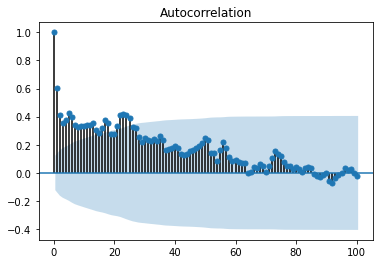

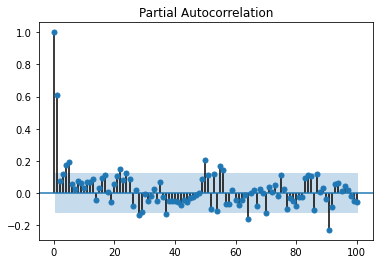

In [26]:
plot_acf( df_alimentos_sin_fds_ni_festivos.groupby('date')['demand'].sum(), lags=100);
plot_pacf( df_alimentos_sin_fds_ni_festivos.groupby('date')['demand'].sum(), lags=100);

In [181]:
from statsmodels.tsa.arima_model import ARIMA

series = df_alimentos_sin_fds_ni_festivos.groupby('date')[['demand']].sum()

# fit model
model = ARIMA(series, order=(1,1,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:               D.demand   No. Observations:                  254
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2118.570
Method:                       css-mle   S.D. of innovations           1004.663
Date:                Sun, 18 Jul 2021   AIC                           4245.140
Time:                        22:29:30   BIC                           4259.289
Sample:                             1   HQIC                          4250.832
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             12.2423      1.306      9.376      0.000       9.683      14.801
ar.L1.D.demand     0.3495      0.059      5.916      0.000       0.234       0.465
ma.L1.D.demand    -1.0000      0.014

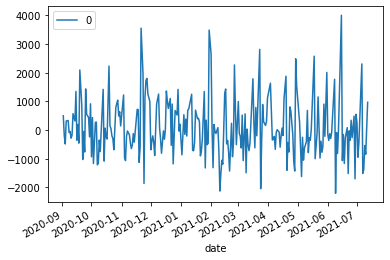

In [182]:
# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()

In [183]:
series.index = pd.to_datetime(series.index.date)

In [185]:
warnings.filterwarnings('ignore')
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

#Iterando
results = []
for p in range(1,9):        
    for d in range(0,4):                
        for q in range(1,9):
            
            try:                
                # Create and fit ARIMA(p,d,q) model
                X = series
                size = int(len(X) * 0.8)
                train, test = X[0:size], X[size:len(X)]

                model = ARIMA(train, order=(p,d,q))
                model_fit = model.fit(disp=0)
                output= model_fit.forecast(steps=len(test))[0]
                yhat = output
                predictions = yhat
                real_values = test
                error = mean_absolute_error(test, predictions)

                # Print p, q, AIC, BIC
                #print(p, d, q, 'Test MAE: %.3f' % error) 
                results.append([p,d,q,error])
                
            except Exception as e:
                #print(p, d, q, None )
                results.append([p,d,q,None])
                
df = pd.DataFrame(results,columns=['p','d','q','mae'])

In [186]:
df.loc[df['mae'] == df['mae'].min()]

,p,d,q,mae
65,3,0,2,706.135209


In [187]:
X = series
size = int(len(X) * 0.8)
train, test = X[0:size], X[size:len(X)]

model = ARIMA(train, order=(3,0,2))
model_fit = model.fit(disp=0)

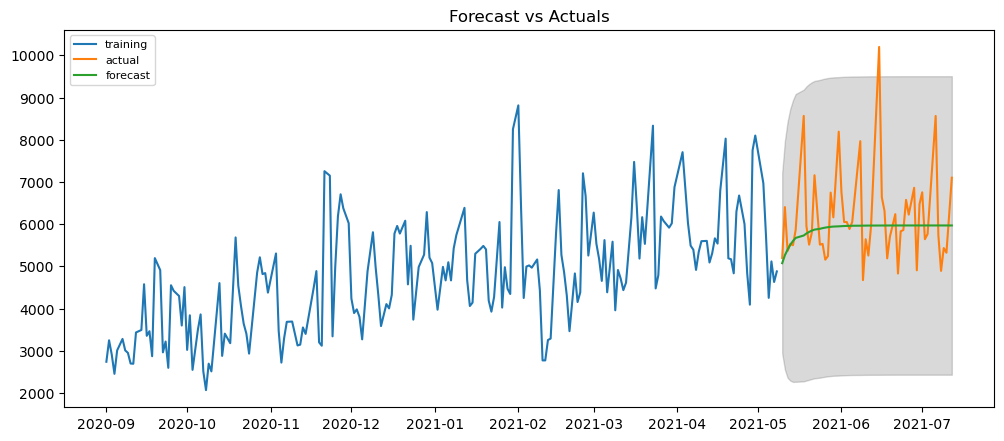

In [189]:
# Forecast
fc, se, conf = model_fit.forecast(51)

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [190]:
from sklearn.metrics import mean_absolute_error

In [191]:
from pmdarima.arima import auto_arima
mean_absolute_error(test, fc)

706.1352091931429

In [192]:
model = auto_arima(train, X=None, start_p=1, d=None, start_q=1, max_p=9, max_d=1, max_q=9)
model_fit = model.fit(train)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  204
Model:               SARIMAX(2, 1, 1)   Log Likelihood               -1688.876
Date:                Sun, 18 Jul 2021   AIC                           3385.751
Time:                        22:34:56   BIC                           3399.004
Sample:                             0   HQIC                          3391.113
                                - 204                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4727      0.074      6.400      0.000       0.328       0.617
ar.L2         -0.1554      0.077     -2.016      0.044      -0.307      -0.004
ma.L1         -0.9283      0.040    -23.446      0.000      -1.006      -0.851
sigma2      9.753e+05   7.72e+04     12.635      0.000    8.24e+05    1.13e+06
===================================================================================
Ljung-Box (Q):                       32.73   Jarque-Bera (JB):                25.59
Prob(Q):                              0.79   Prob(JB):                         0.00
Heteroskedasticity (H):               1.23   Skew:                             0.64
Prob(H) (two-sided):                  0.39   Kurtosis:                         4.18
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

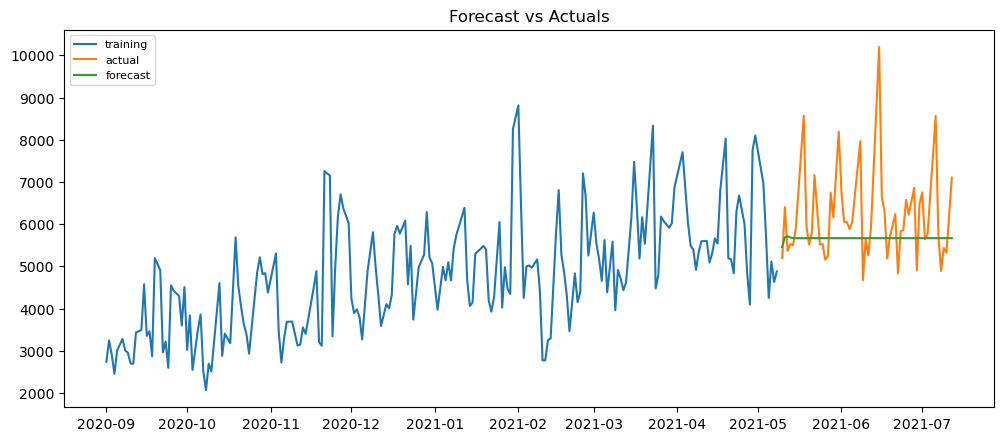

In [193]:
# Forecast
fc = model_fit.predict(51)

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
#lower_series = pd.Series(conf[:, 0], index=test.index)
#upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
#plt.fill_between(lower_series.index, lower_series, upper_series, 
#                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [194]:
mean_absolute_error(test, fc)

748.9924885754529

In [195]:
from prophet.plot import add_changepoints_to_plot
from prophet import Prophet
import pandas as pd
import numpy as np
%matplotlib inline

In [196]:
series = df_alimentos_sin_fds_ni_festivos.groupby('date')['demand'].sum()
df_prophet = pd.DataFrame( series ).reset_index().rename(columns={'date':'ds','demand':'y'})
df_prophet.ds = df_prophet.ds.dt.date

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


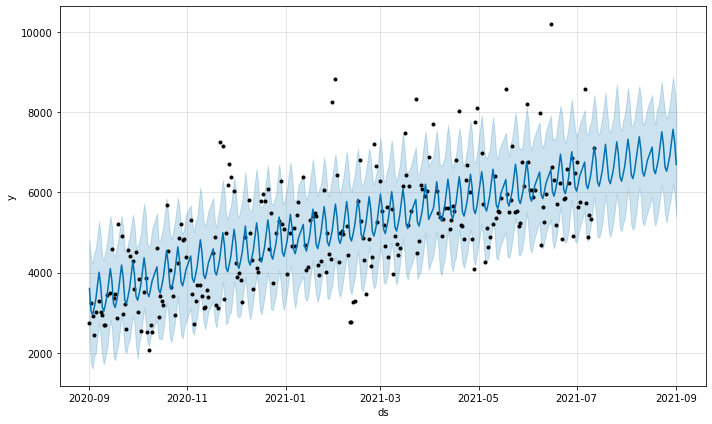

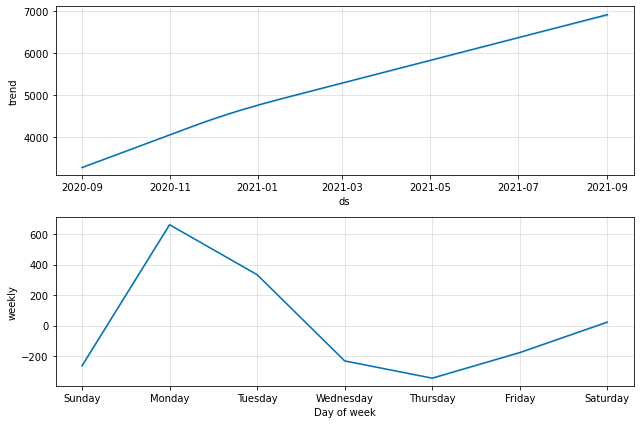

In [198]:
m = Prophet()
m.fit(df_prophet)

future = m.make_future_dataframe(periods=51, freq='D')
future = future[ ~future.ds.dt.weekday.isin([6]) ]
future = future[ ~future.ds.isin( festivos ) ]

forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


fig1 = m.plot(forecast)
m.plot_components(forecast);

In [199]:
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
from prophet.plot import plot_cross_validation_metric
df_cv = cross_validation(m, initial='60 days', period='15 days', horizon = '63 days')

INFO:prophet:Making 13 forecasts with cutoffs between 2020-11-11 00:00:00 and 2021-05-10 00:00:00


In [200]:
df_p = performance_metrics(df_cv)
df_p

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,7 days,1.414147e+06,1189.179267,924.814272,0.185504,0.158037,0.174675,0.719697
1,8 days,1.268739e+06,1126.383194,864.254100,0.163824,0.133578,0.158452,0.760331
2,9 days,1.164731e+06,1079.227224,814.482772,0.152076,0.128536,0.148647,0.767218
3,10 days,1.213198e+06,1101.452456,817.670571,0.147041,0.132843,0.147313,0.774105
4,11 days,1.103120e+06,1050.295310,781.672607,0.145700,0.122983,0.143227,0.793388
5,12 days,1.192960e+06,1092.227228,825.004946,0.154284,0.122983,0.151019,0.782197
6,13 days,1.196428e+06,1093.813317,860.677703,0.170205,0.131275,0.161818,0.737374
7,14 days,1.141442e+06,1068.382874,851.343269,0.173068,0.132843,0.162320,0.736915
8,15 days,1.213647e+06,1101.656613,873.240606,0.175045,0.134087,0.165523,0.719008
9,16 days,1.386133e+06,1177.341701,943.480575,0.195143,0.140936,0.180888,0.673554


In [201]:
df_p["mae"].mean()

921.0509518380245

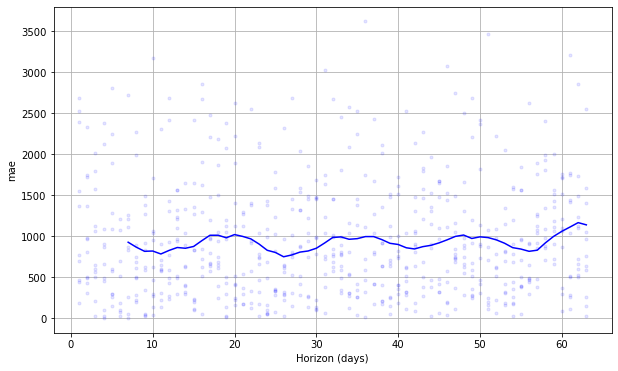

In [202]:
fig = plot_cross_validation_metric(df_cv, metric='mae')

In [203]:
festivos_col = [ (x[0],x[1]) for x in (holidays_co.get_colombia_holidays_by_year(2020) + holidays_co.get_colombia_holidays_by_year(2021)) ]
df_festivos_col = pd.DataFrame( festivos_col, columns=['ds','holiday'])

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


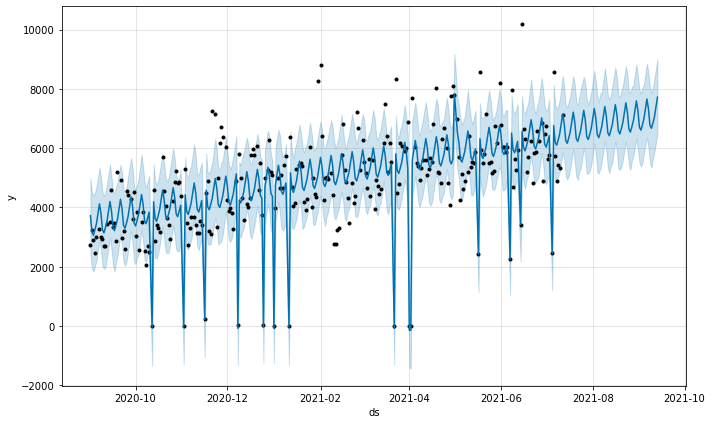

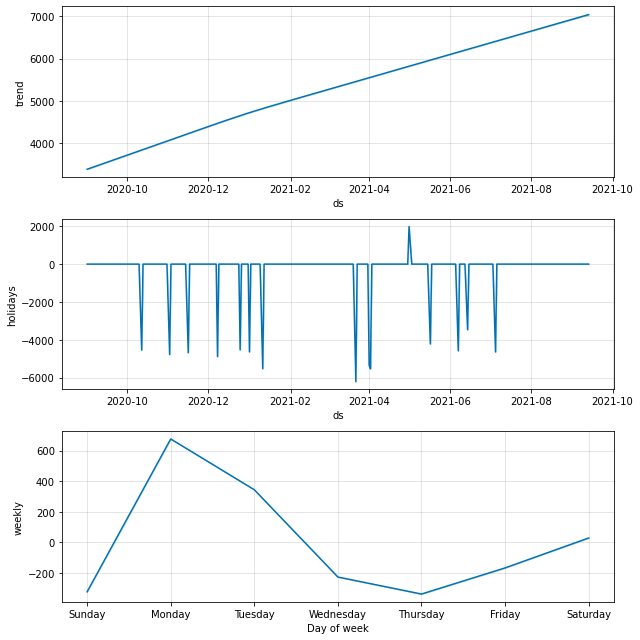

In [204]:
series = df_alimentos_sin_fds.groupby('date')['demand'].sum()

df_prophet = pd.DataFrame( series ).reset_index().rename(columns={'date':'ds','demand':'y'})
df_prophet.ds = df_prophet.ds.dt.date

m = Prophet(holidays = df_festivos_col)
m.fit(df_prophet)

future = m.make_future_dataframe(periods=63, freq='D')
future = future[~future.ds.dt.weekday.isin([6])]

forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


fig1 = m.plot(forecast)
m.plot_components(forecast);

In [205]:
df_cv = cross_validation(m, initial='60 days', period='15 days', horizon = '63 days')

INFO:prophet:Making 13 forecasts with cutoffs between 2020-11-11 00:00:00 and 2021-05-10 00:00:00


In [206]:
df_p = performance_metrics(df_cv)
df_p

INFO:prophet:Skipping MAPE because y close to 0


,horizon,mse,rmse,mae,mdape,smape,coverage
0,7 days,3.210186e+06,1791.699148,1233.055508,0.172334,0.292713,0.648052
1,8 days,2.981753e+06,1726.775259,1167.885469,0.154233,0.272751,0.684416
2,9 days,2.891947e+06,1700.572569,1129.888771,0.154233,0.264983,0.688312
3,10 days,2.936110e+06,1713.508070,1135.337942,0.154233,0.264450,0.692208
4,11 days,3.162093e+06,1778.227518,1136.236321,0.139885,0.270878,0.719048
5,12 days,2.958273e+06,1719.963222,1126.963378,0.142485,0.258077,0.712987
6,13 days,2.253727e+06,1501.241919,1030.411621,0.142485,0.224598,0.709091
7,14 days,2.317153e+06,1522.219688,1036.500662,0.145908,0.238967,0.706494
8,15 days,2.371946e+06,1540.112177,1048.161341,0.142485,0.240725,0.688312
9,16 days,3.036344e+06,1742.510763,1186.872819,0.146435,0.280992,0.635065


In [207]:
df_p["mae"].mean()

1155.7973337355634

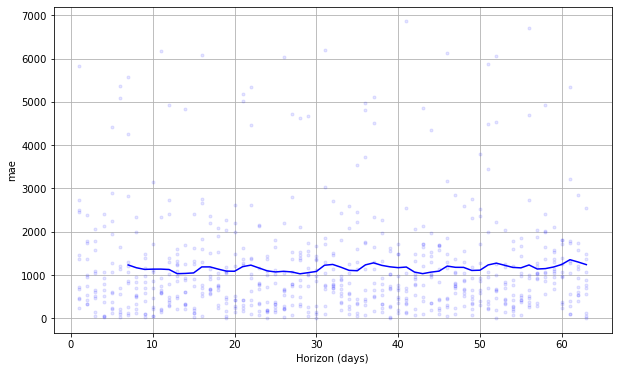

In [208]:
fig = plot_cross_validation_metric(df_cv, metric='mae')